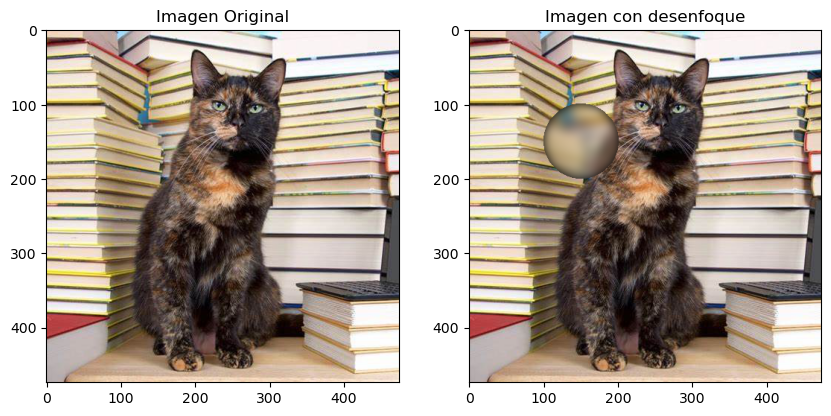

In [40]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt 

def desenfoqueRoi(img,centro,x,y):
    img1=np.copy(img)  # Copia la imagen original para no modificarla directamente 
    valx,valy=centro
    mediox=x//2
    medioy=y//2
    mascara=np.zeros_like(img,dtype=np.uint8)
    cv2.ellipse(mascara,(valx,valy),(mediox,medioy),0,0,360,(255,255,255),-1)  # Dibuja un elipse en la máscara 
    img_mask=cv2.bitwise_and(img1,mascara)  # Aplica la máscara a la imagen original 
    desenfoque=cv2.GaussianBlur(img_mask,(45,45),0)  # Aplica un desenfoque gaussiano a la región de interés 
    img1[mascara>0]=desenfoque[mascara>0]  # Reemplaza la región de interés en la imagen original con la versión desenfocada 
    return img1
img=cv2.imread('gato.jpg')
imagenRgb=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
imgDesenfoque=desenfoqueRoi(imagenRgb,(150,150),100,100)

plt.figure(figsize=(10, 5))
plt.subplot(121)

plt.imshow(imagenRgb)
plt.title('Imagen Original')

plt.subplot(122)
plt.imshow(imgDesenfoque)
plt.title('Imagen con desenfoque')

plt.show()

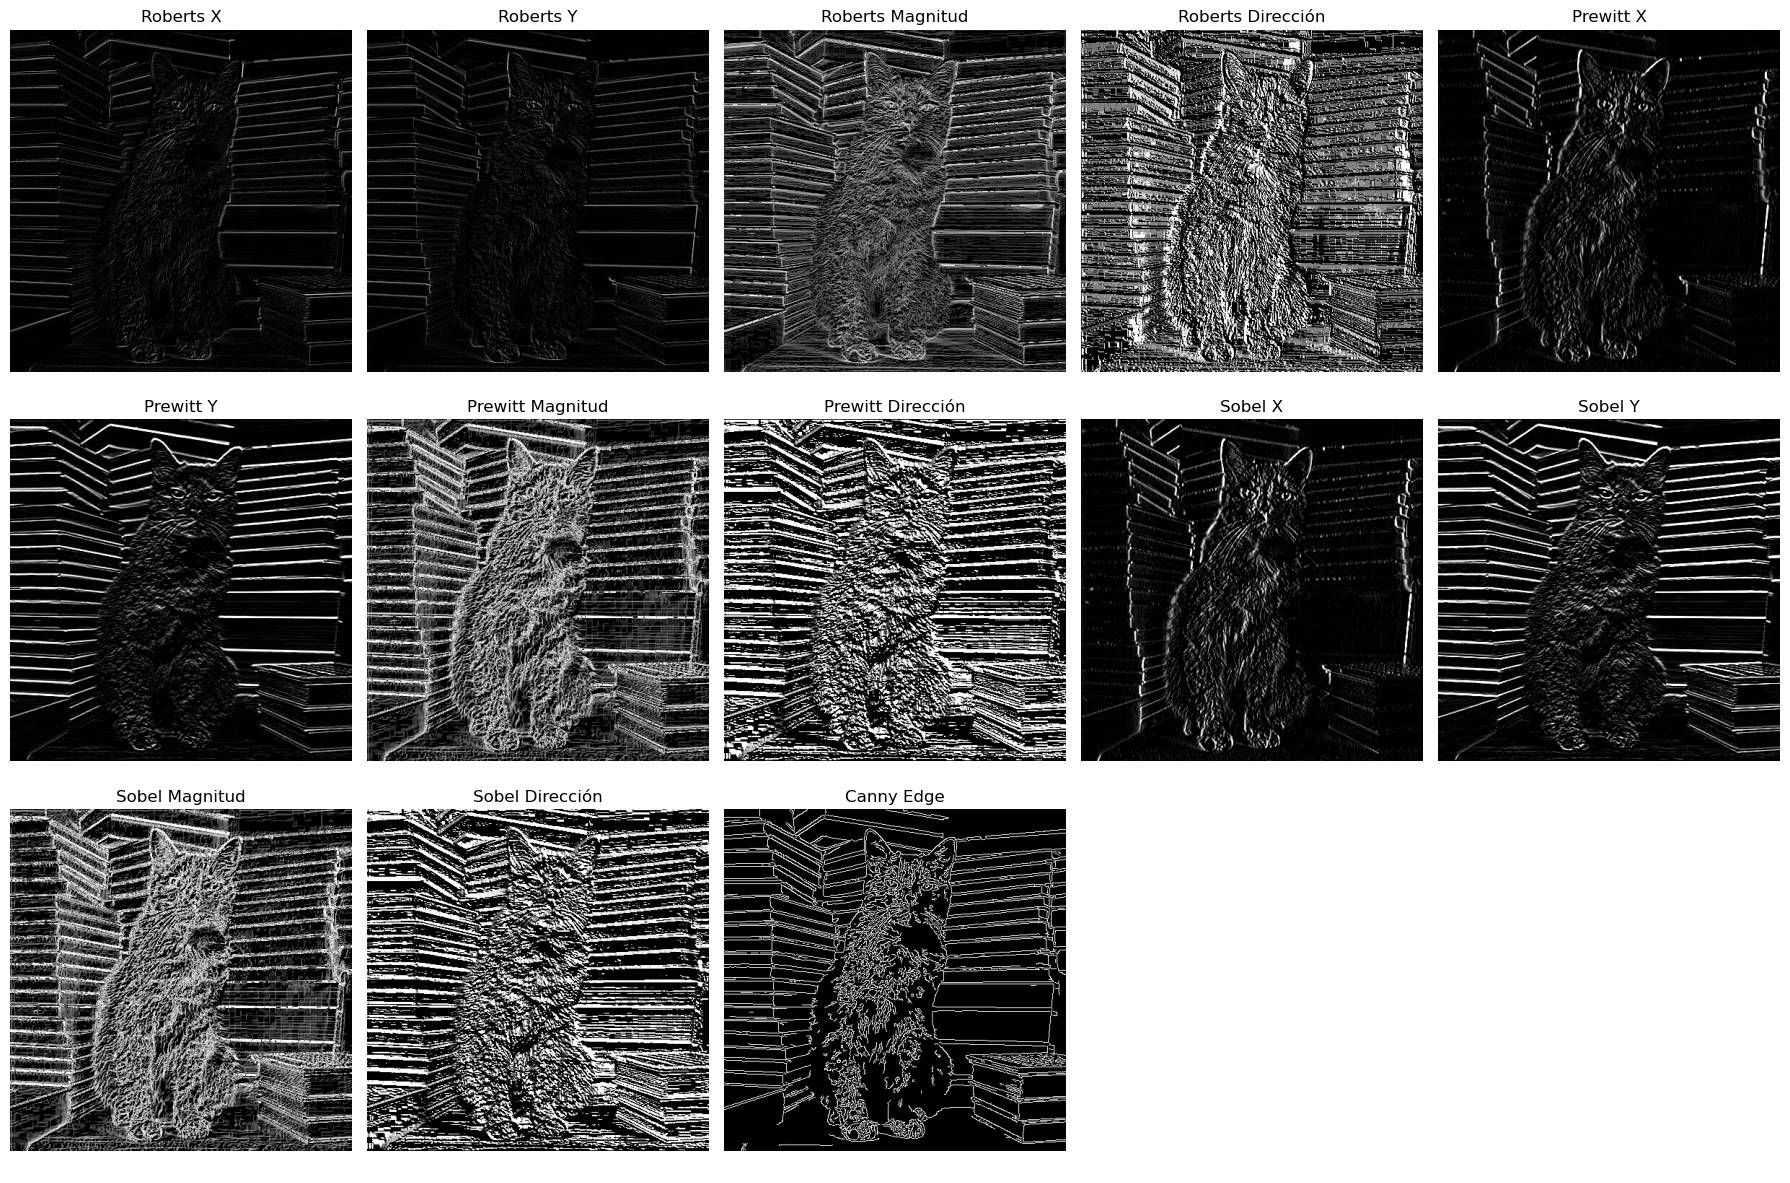

In [41]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt 

# Leer la imagen
img = cv2.imread('gato.jpg')
imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# KERNEL ROBERTS
robertsx = np.array([[-1, 0], [0, 1]])
robertsy = np.array([[0, -1], [1, 0]])

img_robx = cv2.filter2D(imgGray, -1, robertsx)
img_roby = cv2.filter2D(imgGray, -1, robertsy)

rob_gMagnitud = np.sqrt(img_robx*2 + img_roby*2)
rob_gDireccion = np.arctan2(img_roby, img_robx)

# Filtro Prewitt
prewittx = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
prewitty = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])  

img_prewitx = cv2.filter2D(imgGray, -1, prewittx)
img_prewity = cv2.filter2D(imgGray, -1, prewitty)

prew_mag = np.sqrt(img_prewitx*2 + img_prewity*2)  
prew_dir = np.arctan2(img_prewity, img_prewitx)  

# Filtro Sobel
sobelx = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
sobely = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])

sobx_imge = cv2.filter2D(imgGray, -1, sobelx)
soby_imge = cv2.filter2D(imgGray, -1, sobely)

sobel_grad = np.sqrt(sobx_imge*2 + soby_imge*2) 
sob_dire = np.arctan2(soby_imge, sobx_imge)  

# Canny Edge Detection
canny = cv2.Canny(imgGray, 100, 200)

plt.figure(figsize=(18, 12)) 

# Roberts
plt.subplot(3, 5, 1)
plt.imshow(img_robx, cmap='gray')
plt.title('Roberts X')
plt.axis('off')

plt.subplot(3, 5, 2)
plt.imshow(img_roby, cmap='gray')
plt.title('Roberts Y')
plt.axis('off')

plt.subplot(3, 5, 3)
plt.imshow(rob_gMagnitud, cmap='gray')
plt.title('Roberts Magnitud')
plt.axis('off')

plt.subplot(3, 5, 4)
plt.imshow(rob_gDireccion, cmap='gray')
plt.title('Roberts Dirección')
plt.axis('off')

# Prewitt
plt.subplot(3, 5, 5)
plt.imshow(img_prewitx, cmap='gray')
plt.title('Prewitt X')
plt.axis('off')

plt.subplot(3, 5, 6)
plt.imshow(img_prewity, cmap='gray')
plt.title('Prewitt Y')
plt.axis('off')

plt.subplot(3, 5, 7)
plt.imshow(prew_mag, cmap='gray')
plt.title('Prewitt Magnitud')
plt.axis('off')

plt.subplot(3, 5, 8)
plt.imshow(prew_dir, cmap='gray')
plt.title('Prewitt Dirección')
plt.axis('off')

# Sobel
plt.subplot(3, 5, 9)
plt.imshow(sobx_imge, cmap='gray')
plt.title('Sobel X')
plt.axis('off')

plt.subplot(3, 5, 10)
plt.imshow(soby_imge, cmap='gray')
plt.title('Sobel Y')
plt.axis('off')

plt.subplot(3, 5, 11)
plt.imshow(sobel_grad, cmap='gray')
plt.title('Sobel Magnitud')
plt.axis('off')

plt.subplot(3, 5, 12)
plt.imshow(sob_dire, cmap='gray')
plt.title('Sobel Dirección')
plt.axis('off')

plt.subplot(3, 5, 13)
plt.imshow(canny, cmap='gray')
plt.title('Canny Edge')
plt.axis('off')

plt.subplot(3, 5, 14)
plt.axis('off')
plt.subplot(3, 5, 15)
plt.axis('off')

plt.tight_layout()
plt.show()

ROBERTS

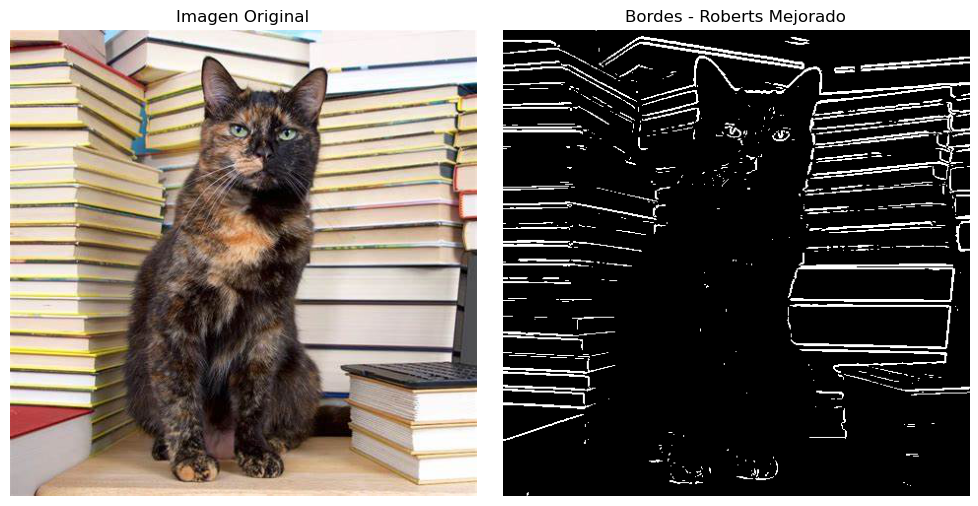

In [42]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def roberts_mejorado(imagen):
    img_gray = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
    suavizado = cv2.GaussianBlur(img_gray, (3, 3), 0)
    kernelx = np.array([[1, 0], [0, -1]], dtype=np.float32)
    kernely = np.array([[0, 1], [-1, 0]], dtype=np.float32)
    robx = cv2.filter2D(suavizado, cv2.CV_16S, kernelx)
    roby = cv2.filter2D(suavizado, cv2.CV_16S, kernely)
    roberts = cv2.addWeighted(np.abs(robx), 0.5, np.abs(roby), 0.5, 0)
    roberts = np.uint8(np.clip(roberts, 0, 255))
    _, bordes = cv2.threshold(roberts, 30, 255, cv2.THRESH_BINARY)
    return bordes

imagen = cv2.imread('gato.jpg')
bordes = roberts_mejorado(imagen)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(bordes, cmap='gray')
plt.title('Bordes - Roberts Mejorado')
plt.axis('off')

plt.tight_layout()
plt.show()


sobel mejorado

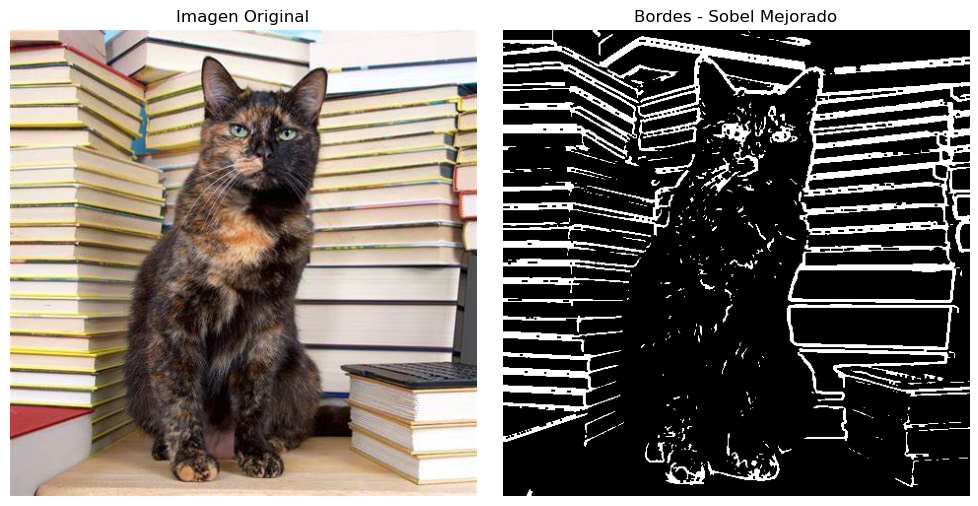

In [43]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def sobel_mejor(imagen, tam_kernel=3, umbral=30):
    img_gray = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
    img_gray = cv2.GaussianBlur(img_gray, (3, 3), 0)
    sobelx = cv2.Sobel(img_gray, cv2.CV_64F, 1, 0, ksize=tam_kernel)
    sobely = cv2.Sobel(img_gray, cv2.CV_64F, 0, 1, ksize=tam_kernel)
    magnitud = np.sqrt(sobelx ** 2 + sobely ** 2)
    magnitud = cv2.normalize(magnitud, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
    _, bordes = cv2.threshold(magnitud, umbral, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    kernel_morf = np.ones((2, 2), np.uint8)
    bordes = cv2.morphologyEx(bordes, cv2.MORPH_CLOSE, kernel_morf)
    return bordes

imagen = cv2.imread('gato.jpg')
bordes = sobel_mejor(imagen)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(bordes, cmap='gray')
plt.title('Bordes - Sobel Mejorado')
plt.axis('off')

plt.tight_layout()
plt.show()


PREWITT MEJORADO

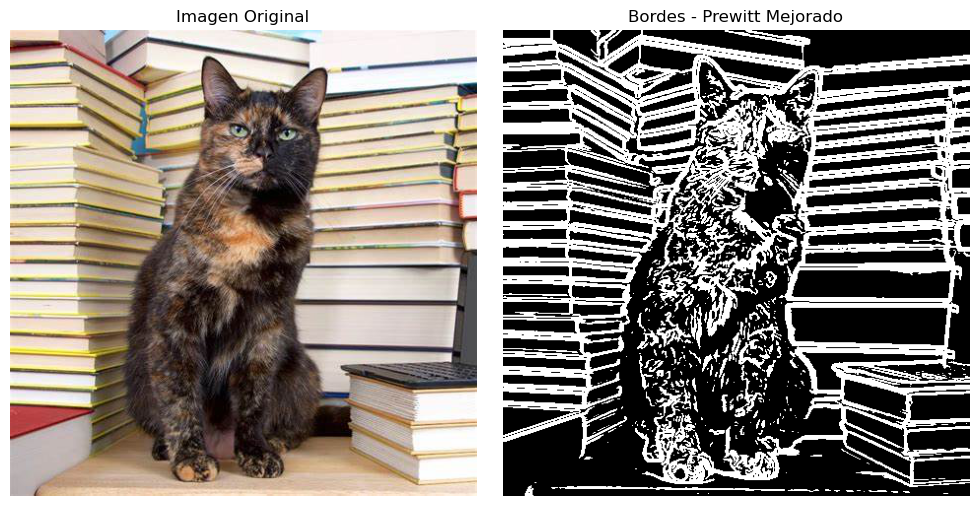

In [44]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def prewitt_mejor(imagen):
    img_gray = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
    img_gray = cv2.GaussianBlur(img_gray, (5, 5), 1)

    prewittx = np.array([[3, 0, -3], [3, 0, -3], [3, 0, -3]], dtype=np.float32)
    prewitty = np.array([[3, 3, 3], [0, 0, 0], [-3, -3, -3]], dtype=np.float32)

    x = cv2.filter2D(img_gray, cv2.CV_64F, prewittx)
    y = cv2.filter2D(img_gray, cv2.CV_64F, prewitty)

    magnitud = np.sqrt(x**2 + y**2)
    magnitud = cv2.convertScaleAbs(magnitud)  # suaviza y evita saturación

    _, bordes = cv2.threshold(magnitud, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    return bordes

imagen = cv2.imread('gato.jpg')
bordes = prewitt_mejor(imagen)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(bordes, cmap='gray')
plt.title('Bordes - Prewitt Mejorado')
plt.axis('off')

plt.tight_layout()
plt.show()


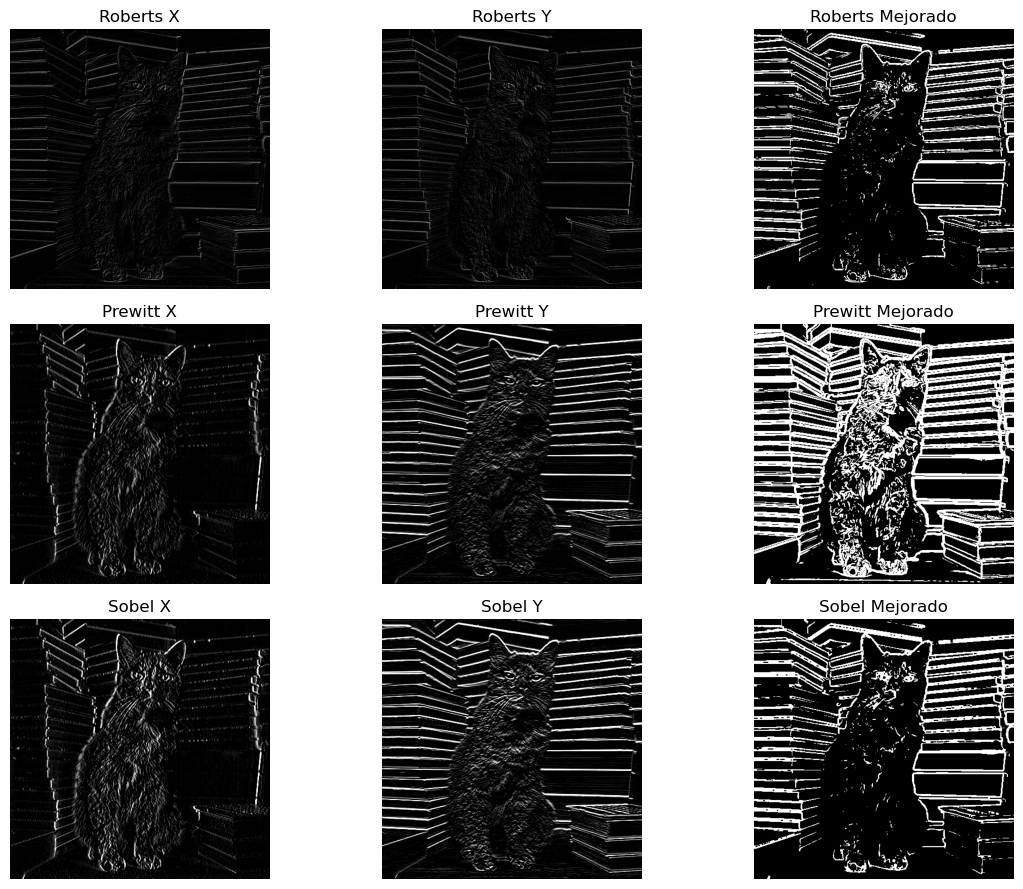

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

imagen = cv2.imread('gato.jpg')
imgGray = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)

robertsx = np.array([[-1, 0], [0, 1]])
robertsy = np.array([[0, -1], [1, 0]])
img_robx = cv2.filter2D(imgGray, -1, robertsx)
img_roby = cv2.filter2D(imgGray, -1, robertsy)

def roberts_mejorado(imagen):
    img_gray = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
    suavizado = cv2.GaussianBlur(img_gray, (3, 3), 0)
    kernelx = np.array([[1, 0], [0, -1]], dtype=np.float32)
    kernely = np.array([[0, 1], [-1, 0]], dtype=np.float32)
    robx = cv2.filter2D(suavizado, cv2.CV_16S, kernelx)
    roby = cv2.filter2D(suavizado, cv2.CV_16S, kernely)
    roberts = cv2.addWeighted(np.abs(robx), 0.5, np.abs(roby), 0.5, 0)
    roberts = np.uint8(np.clip(roberts, 0, 255))
    _, bordes = cv2.threshold(roberts, 30, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return bordes

prewittx = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
prewitty = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])
img_prewitx = cv2.filter2D(imgGray, -1, prewittx)
img_prewity = cv2.filter2D(imgGray, -1, prewitty)

def prewitt_mejor(imagen):
    img_gray = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
    img_gray = cv2.GaussianBlur(img_gray, (5, 5), 1)
    px = np.array([[3, 0, -3], [3, 0, -3], [3, 0, -3]], dtype=np.float32)
    py = np.array([[3, 3, 3], [0, 0, 0], [-3, -3, -3]], dtype=np.float32)
    x = cv2.filter2D(img_gray, cv2.CV_64F, px)
    y = cv2.filter2D(img_gray, cv2.CV_64F, py)
    magnitud = np.sqrt(x**2 + y**2)
    magnitud = cv2.convertScaleAbs(magnitud)
    _, bordes = cv2.threshold(magnitud, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return bordes

sobelx = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
sobely = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
sobx_imge = cv2.filter2D(imgGray, -1, sobelx)
soby_imge = cv2.filter2D(imgGray, -1, sobely)

def sobel_mejor(imagen, tam_kernel=3, umbral=30):
    img_gray = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
    img_gray = cv2.GaussianBlur(img_gray, (3, 3), 0)
    sx = cv2.Sobel(img_gray, cv2.CV_64F, 1, 0, ksize=tam_kernel)
    sy = cv2.Sobel(img_gray, cv2.CV_64F, 0, 1, ksize=tam_kernel)
    magnitud = np.sqrt(sx ** 2 + sy ** 2)
    magnitud = cv2.normalize(magnitud, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
    _, bordes = cv2.threshold(magnitud, umbral, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    kernel_morf = np.ones((2, 2), np.uint8)
    bordes = cv2.morphologyEx(bordes, cv2.MORPH_CLOSE, kernel_morf)
    return bordes

plt.figure(figsize=(12, 9))

plt.subplot(3, 3, 1)
plt.imshow(img_robx, cmap='gray')
plt.title('Roberts X')
plt.axis('off')

plt.subplot(3, 3, 2)
plt.imshow(img_roby, cmap='gray')
plt.title('Roberts Y')
plt.axis('off')

plt.subplot(3, 3, 3)
plt.imshow(roberts_mejorado(imagen), cmap='gray')
plt.title('Roberts Mejorado')
plt.axis('off')

plt.subplot(3, 3, 4)
plt.imshow(img_prewitx, cmap='gray')
plt.title('Prewitt X')
plt.axis('off')

plt.subplot(3, 3, 5)
plt.imshow(img_prewity, cmap='gray')
plt.title('Prewitt Y')
plt.axis('off')

plt.subplot(3, 3, 6)
plt.imshow(prewitt_mejor(imagen), cmap='gray')
plt.title('Prewitt Mejorado')
plt.axis('off')

plt.subplot(3, 3, 7)
plt.imshow(sobx_imge, cmap='gray')
plt.title('Sobel X')
plt.axis('off')

plt.subplot(3, 3, 8)
plt.imshow(soby_imge, cmap='gray')
plt.title('Sobel Y')
plt.axis('off')

plt.subplot(3, 3, 9)
plt.imshow(sobel_mejor(imagen), cmap='gray')
plt.title('Sobel Mejorado')
plt.axis('off')

plt.tight_layout()
plt.show()


REGIONES CONECTIVIDAD Y FRONTERAS

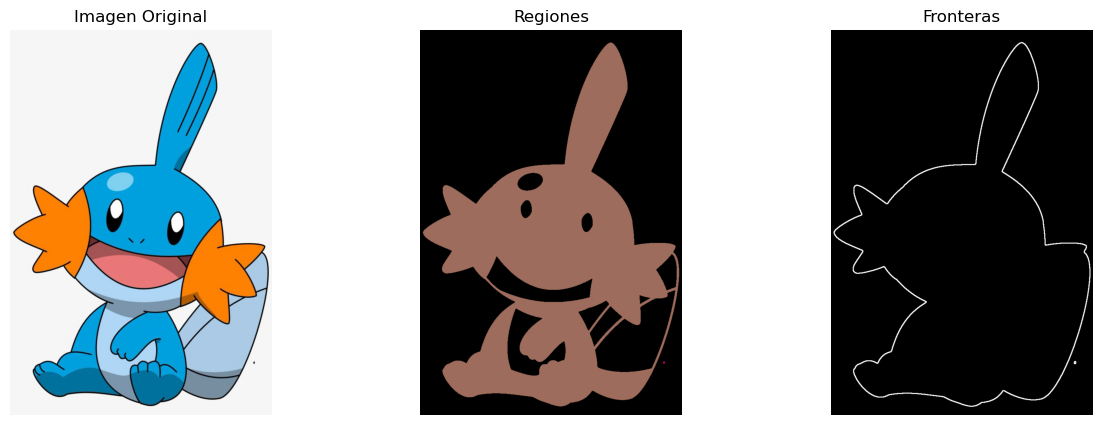

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

imagen = cv2.imread('mudkip.jpg')
gray = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (7, 7), 0)

_, binarized = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

#Regiones
cant, region = cv2.connectedComponents(binarized)
colores = np.random.randint(0, 255, size=(cant, 3), dtype=np.uint8)
colores[0] = [0, 0, 0]
region_coloreada = colores[region]

#Fronteras
contorno, _ = cv2.findContours(binarized, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
lines = cv2.drawContours(np.zeros_like(gray), contorno, -1, 255, 2)

#Mostrar imagenes
plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.title('Imagen Original')
plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(132)
plt.title('Regiones')
plt.imshow(region_coloreada)
plt.axis('off')

plt.subplot(133)
plt.title('Fronteras')
plt.imshow(lines, cmap='gray')
plt.axis('off')
plt.show()

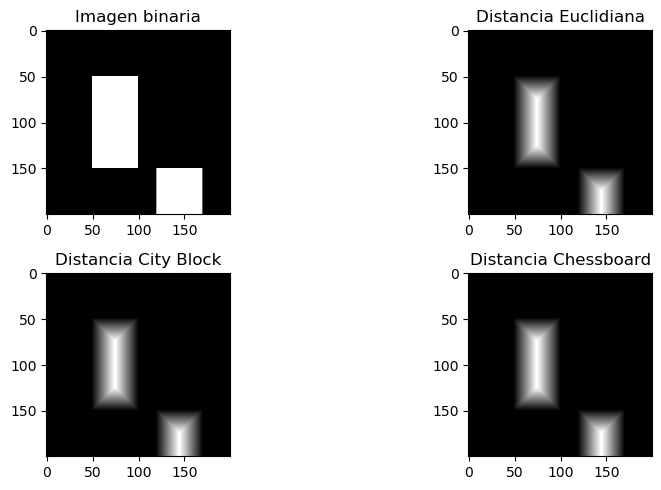

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Crear una imagen binaria 200x200
img = np.zeros((200, 200), dtype=np.uint8)

# Dibujar dos regiones blancas (valor 1)
img[50:150, 50:100] = 1
img[150:200, 120:170] = 1  # Corrección de la línea errónea

# Función para calcular distancias
def distancia(img_binarizada):
    dist_eucli = cv2.distanceTransform(img_binarizada, cv2.DIST_L2, 3)
    dist_city = cv2.distanceTransform(img_binarizada, cv2.DIST_L1, 3)
    dist_chess = cv2.distanceTransform(img_binarizada, cv2.DIST_C, 3)
    return dist_chess, dist_city, dist_eucli

# Calcular distancias
eucl, city, chess = distancia(img)

# Función para normalizar las distancias a rango 0-255
def normalizar(dist):
    return cv2.normalize(dist, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

# Normalizar resultados
normcl = normalizar(eucl)
normcity = normalizar(city)
normchess = normalizar(chess)

# Mostrar resultados
plt.figure(figsize=(10, 5))
plt.subplot(2, 2, 1)
plt.title('Imagen binaria')
plt.imshow(img, cmap='gray')

plt.subplot(2, 2, 2)
plt.title('Distancia Euclidiana')
plt.imshow(normcl, cmap='gray')

plt.subplot(2, 2, 3)
plt.title('Distancia City Block')
plt.imshow(normcity, cmap='gray')

plt.subplot(2, 2, 4)
plt.title('Distancia Chessboard')
plt.imshow(normchess, cmap='gray')

plt.tight_layout()
plt.show()


skimage

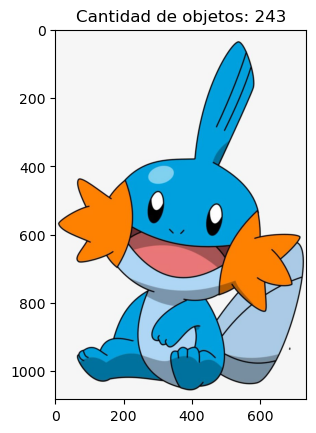

In [29]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import measure

def contar(imagen):
    gray = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
    _, binarizar = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
    etiquetar = measure.label(binarizar, connectivity=2)
    num = np.max(etiquetar)
    return num

imagen = cv2.imread('mudkip.jpg')
contarr = contar(imagen)

plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
plt.title(f'Cantidad de objetos: {contarr}')
plt.show()


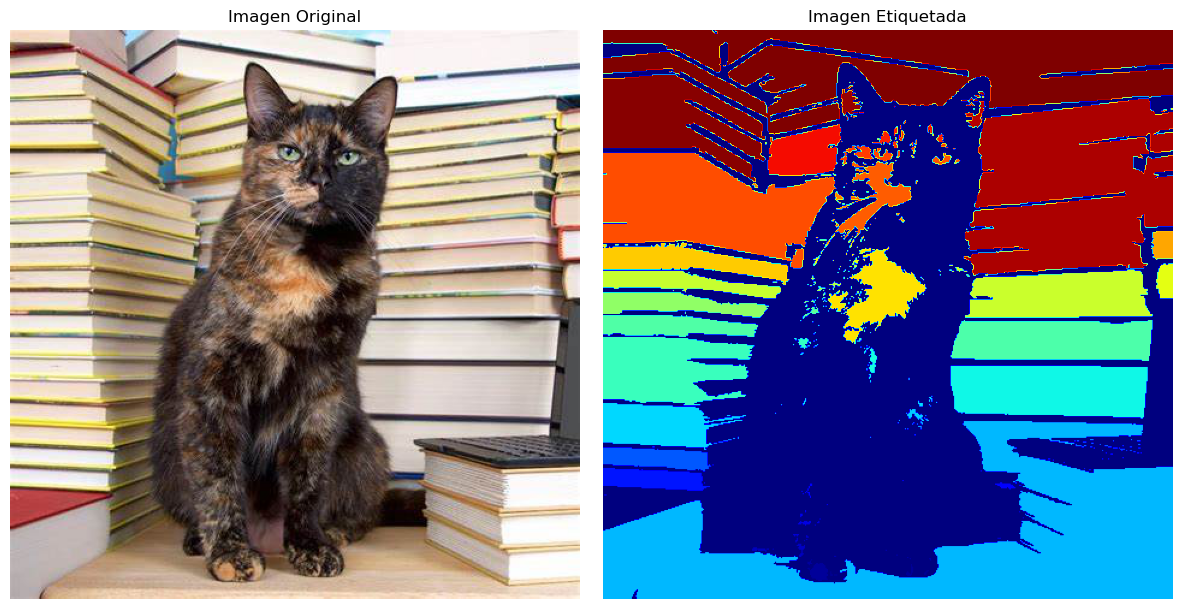

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import measure  

def etiquetar(img):
    if len(img.shape) == 3:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    

    _, imgBIN = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)


    img_etiq = np.zeros_like(img, dtype=np.int32)
    contornos, _ = cv2.findContours(imgBIN, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    for i, contorno in enumerate(contornos):
        cv2.drawContours(img_etiq, [contorno], -1, i + 1, -1)

    return img_etiq


imagen = cv2.imread("gato.jpg")
imagen_rgb = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)

# Etiquetar
imagen_etiqueta = etiquetar(imagen)

# Mostrar resultados
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title("Imagen Original")
plt.imshow(imagen_rgb)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Imagen Etiquetada")
plt.imshow(imagen_etiqueta, cmap="jet")
plt.axis('off')

plt.tight_layout()
plt.show()


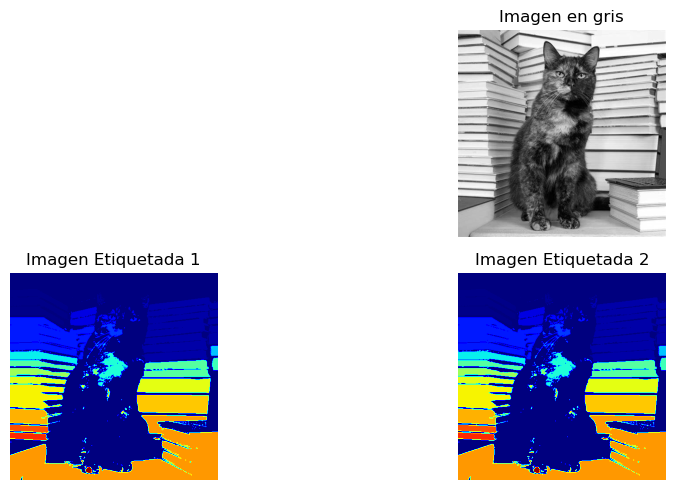

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import measure

# Leer la imagen en escala de grises
img_gray = cv2.imread("gato.jpg", cv2.IMREAD_GRAYSCALE)

# Umbralización binaria
_, imgbin = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)

# Etiquetado
img_etiq = measure.label(imgbin, connectivity=1)

# Mostrar las imágenes
plt.figure(figsize=(10, 5))

plt.subplot(2, 2, 2)
plt.title("Imagen en gris")
plt.imshow(img_gray, cmap="gray")
plt.axis("off")

plt.subplot(2, 2, 3)
plt.title("Imagen Etiquetada 1")
plt.imshow(img_etiq, cmap="jet")
plt.axis("off")

plt.subplot(2, 2, 4)
plt.title("Imagen Etiquetada 2")
plt.imshow(img_etiq, cmap="jet")
plt.axis("off")

plt.tight_layout()
plt.show()


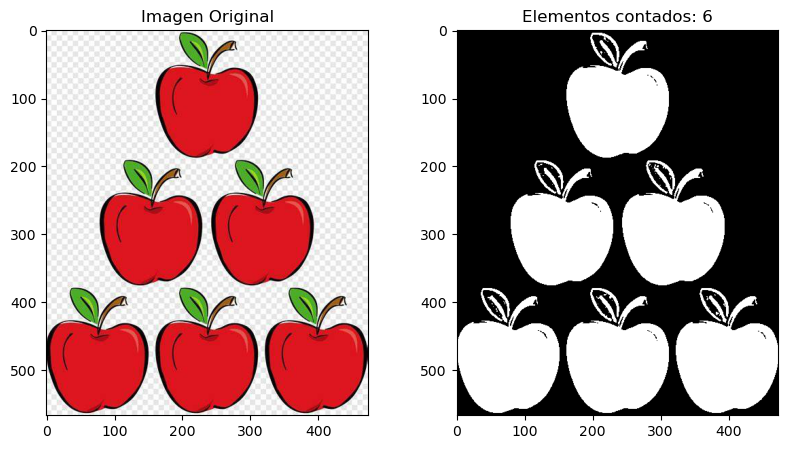

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import measure

def conteo(img, area_minima=1000):
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_blur = cv2.GaussianBlur(img_gray, (5, 5), 0)
    _, binaria = cv2.threshold(img_blur, 127, 255, cv2.THRESH_BINARY_INV)

    contornos, _ = cv2.findContours(binaria, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    #filtro para eliminar los objetos muy chiquitos
    contornos_filtrados = [cnt for cnt in contornos if cv2.contourArea(cnt) > area_minima]

    return len(contornos_filtrados), binaria

imagen = cv2.imread('manzana.jpg')
img_cont, bin = conteo(imagen)

plt.figure(figsize=(15, 5))


plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
plt.title('Imagen Original')


plt.subplot(1, 3, 2)
plt.imshow(bin, cmap='gray')
plt.title(f'Elementos contados: {img_cont}')

plt.show()


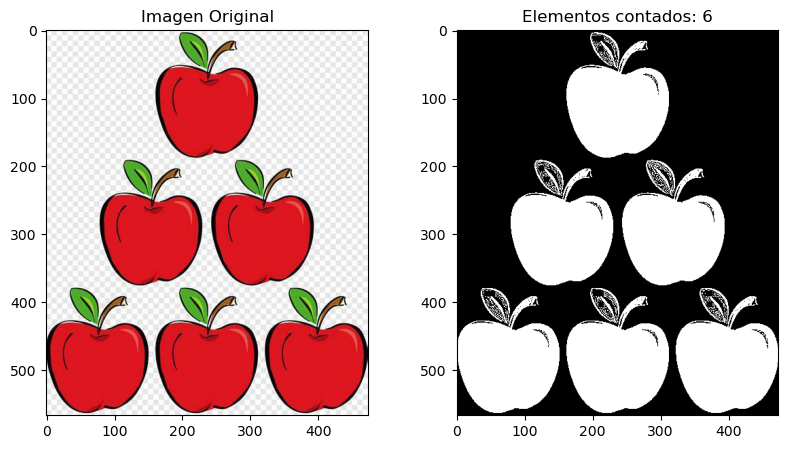

In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import measure

def contar2(img, area_minima=1000):
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, binarizada = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY_INV)
    contorno = measure.label(binarizada, connectivity=2)
    regiones = measure.regionprops(contorno)
    cont = len([r for r in regiones if r.area > area_minima])
    return cont, binarizada

imagen = cv2.imread('manzana.jpg')
contado, bin = contar2(imagen)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
plt.title('Imagen Original')

plt.subplot(1, 3, 2)
plt.imshow(bin, cmap='gray')
plt.title(f'Elementos contados: {contado}')

plt.show()
